In [1]:
!python --version

Python 3.10.12


In [2]:
import sys
sys.version

'3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]'

In [3]:
!pip show pip

Name: pip
Version: 24.1.2
Summary: The PyPA recommended tool for installing Python packages.
Home-page: https://pip.pypa.io/
Author: 
Author-email: The pip developers <distutils-sig@python.org>
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: fastai


In [4]:
import sys

if sys.version_info.major >= 3 and sys.version_info.minor >=10 and sys.version_info.micro >=0:
  print("correct python version")
else:
  print("please use python version 3.10.11 for kaggle and above colab")

correct python version


## importing book

In [5]:
  import numpy as np
  import pandas as pd
  import matplotlib
  import matplotlib.pyplot as plt

In [6]:
print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)

1.26.4
2.2.3
3.7.5


In [7]:
pip show requests

Name: requests
Version: 2.32.3
Summary: Python HTTP for Humans.
Home-page: https://requests.readthedocs.io
Author: Kenneth Reitz
Author-email: me@kennethreitz.org
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: certifi, charset-normalizer, idna, urllib3
Required-by: bigframes, CacheControl, community, datasets, datashader, diffusers, docker, earthengine-api, fastai, folium, gcsfs, gdown, geocoder, google-api-core, google-cloud-bigquery, google-cloud-storage, google-colab, google-genai, h2o, huggingface-hub, id, jupyterlab_server, kaggle, kaggle-environments, kagglehub, keras-tuner, langchain, langsmith, libpysal, moviepy, music21, nilearn, pandas-datareader, panel, papermill, pooch, pymystem3, ray, requests-oauthlib, requests-toolbelt, sigstore, spacy, Sphinx, tensorflow, tensorflow-datasets, tiktoken, transformers, tsfresh, tuf, tweepy, update-checker, wandb, weasel, ydata-profiling, yfinance
Note: you may need to restart the kernel to use updated packa

In [8]:
def download_book_from_web(url):
    import requests

    try:
        response = requests.get(url)
        response.encoding = 'utf-8'  # Set encoding

        # Check if the request was successful
        if response.status_code == 200:
            text = response.text  # Store the text in a variable

            # Save to file (optional)
            with open('book.txt', 'w', encoding='utf-8') as f:
                print('Book downloaded successfully!')
                f.write(text)

            return text  # Return the variable for further use
        else:
            print(f"Failed to fetch book text. Status code: {response.status_code}")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error downloading book: {e}")
        return None
url = 'https://www.gutenberg.org/files/244/244-0.txt'
text=download_book_from_web(url)

Book downloaded successfully!


In [9]:
text[:1000]

'\ufeffThe Project Gutenberg eBook of A Study In Scarlet, by Arthur Conan Doyle\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: A Study In Scarlet\r\n\r\nAuthor: Arthur Conan Doyle\r\n\r\nRelease Date: April, 1995 [eBook #244]\r\n[Most recently updated: April 18, 2023]\r\n\r\nLanguage: English\r\n\r\nProduced by: Roger Squires and David Widger\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK A STUDY IN SCARLET ***\r\n\r\n\r\n\r\n\r\nA STUDY IN SCARLET\r\n\r\nBy A. Conan Doyle\r\n\r\n\r\n\r\n\r\nCONTENTS\r\n\r\n A STUDY IN SCARLET.\r\n\r\n PART I.\r\n CHAPTER I.

In [10]:
text[-1000:-1]

'/donate\r\n\r\nSection 5. General Information About Project Gutenberg™ electronic works\r\n\r\nProfessor Michael S. Hart was the originator of the Project\r\nGutenberg™ concept of a library of electronic works that could be\r\nfreely shared with anyone. For forty years, he produced and\r\ndistributed Project Gutenberg™ eBooks with only a loose network of\r\nvolunteer support.\r\n\r\nProject Gutenberg™ eBooks are often created from several printed\r\neditions, all of which are confirmed as not protected by copyright in\r\nthe U.S. unless a copyright notice is included. Thus, we do not\r\nnecessarily keep eBooks in compliance with any particular paper\r\nedition.\r\n\r\nMost people start at our website which has the main PG search\r\nfacility: www.gutenberg.org\r\n\r\nThis website includes information about Project Gutenberg™,\r\nincluding how to make donations to the Project Gutenberg Literary\r\nArchive Foundation, how to help produce our new eBooks, and how to\r\nsubscribe to our ema

In [13]:
# Extract Title and Author from metadata
import re
mo_title = re.search(r"Title: ([^\r\n]+)", text)
mo_author = re.search(r"Author: ([^\r\n]+)", text)

if mo_title and mo_author:
    Title = mo_title.group(1).strip()  # "A Study In Scarlet"
    Author = mo_author.group(1).strip()  # "Arthur Conan Doyle"
    print(f"Title: {Title}")
    print(f"Author: {Author}")
else:
    print("Metadata not found.")

Title: A Study In Scarlet
Author: Arthur Conan Doyle


In [14]:
Title

'A Study In Scarlet'

In [15]:
Author

'Arthur Conan Doyle'

# stripping content

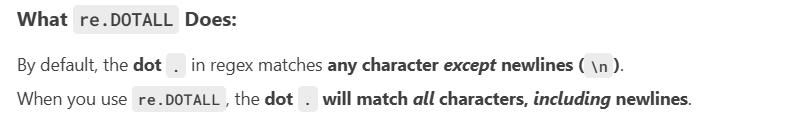

In [16]:
import re

def remove_gutenberg_header_footer(text):
    """
    Removes the Project Gutenberg header and footer from the text.
    Returns the cleaned content.
    """
    # Header pattern (already compiled with re.DOTALL)
    header_pattern = re.compile(
        r'^.*?\*\*\* START OF THE PROJECT GUTENBERG EBOOK .*?\*\*\*',
        re.DOTALL  # DOTALL applied HERE during compilation
    )
    
    # Footer pattern (already compiled with re.DOTALL)
    footer_pattern = re.compile(
        r'\*\*\* END OF THE PROJECT GUTENBERG EBOOK .*?\*\*\*.*$',
        re.DOTALL  # DOTALL applied HERE during compilation
    )
    
    # Remove header (NO flags needed, pattern is pre-compiled)
    text = header_pattern.sub('', text)
    
    # Remove footer (NO flags needed, pattern is pre-compiled)
    text = footer_pattern.sub('', text)
    
    return text.strip()

In [17]:

header_footer_removed = remove_gutenberg_header_footer(text)
print("header_footer_removed")

header_footer_removed


In [18]:
header_footer_removed[-1000:-1]

' British soil. It is an\r\nopen secret that the credit of this smart capture belongs entirely to\r\nthe well-known Scotland Yard officials, Messrs. Lestrade and Gregson.\r\nThe man was apprehended, it appears, in the rooms of a certain Mr.\r\nSherlock Holmes, who has himself, as an amateur, shown some talent in\r\nthe detective line, and who, with such instructors, may hope in time to\r\nattain to some degree of their skill. It is expected that a testimonial\r\nof some sort will be presented to the two officers as a fitting\r\nrecognition of their services.”\r\n\r\n“Didn’t I tell you so when we started?” cried Sherlock Holmes with a\r\nlaugh. “That’s the result of all our Study in Scarlet: to get them a\r\ntestimonial!”\r\n\r\n“Never mind,” I answered, “I have all the facts in my journal, and the\r\npublic shall know them. In the meantime you must make yourself\r\ncontented by the consciousness of success, like the Roman miser—\r\n\r\n\r\n“‘Populus me sibilat, at mihi plaudo\r\nIpse d

In [19]:
header_footer_removed[:1000]

'A STUDY IN SCARLET\r\n\r\nBy A. Conan Doyle\r\n\r\n\r\n\r\n\r\nCONTENTS\r\n\r\n A STUDY IN SCARLET.\r\n\r\n PART I.\r\n CHAPTER I. MR. SHERLOCK HOLMES.\r\n CHAPTER II. THE SCIENCE OF DEDUCTION.\r\n CHAPTER III. THE LAURISTON GARDENS MYSTERY\r\n CHAPTER IV. WHAT JOHN RANCE HAD TO TELL.\r\n CHAPTER V. OUR ADVERTISEMENT BRINGS A VISITOR.\r\n CHAPTER VI. TOBIAS GREGSON SHOWS WHAT HE CAN DO.\r\n CHAPTER VII. LIGHT IN THE DARKNESS.\r\n\r\n PART II. THE COUNTRY OF THE SAINTS\r\n CHAPTER I. ON THE GREAT ALKALI PLAIN.\r\n CHAPTER II. THE FLOWER OF UTAH.\r\n CHAPTER III. JOHN FERRIER TALKS WITH THE PROPHET.\r\n CHAPTER IV. A FLIGHT FOR LIFE.\r\n CHAPTER V. THE AVENGING ANGELS.\r\n CHAPTER VI. A CONTINUATION OF THE REMINISCENCES OF JOHN WATSON, M.D.\r\n CHAPTER VII. THE CONCLUSION.\r\n\r\n\r\n\r\n\r\nA STUDY IN SCARLET.\r\n\r\n\r\n\r\n\r\nPART I.\r\n\r\n\r\n(_Being a reprint from the Reminiscences of_ JOHN H. WATSON, M.D.,\r\n_Late of the Army Medical Department._)\r\n\r\n\r\n\r\n\r\nCHAPTER I.\

In [20]:
import re

def remove_table_of_contents(text):
    """
    Removes the table of contents from the text, keeping only the actual content
    starting from the second occurrence of "PART I."
    
    Args:
        text (str): The full text containing table of contents and main content
        
    Returns:
        str: The text with table of contents removed
    """
    # Split the text at each "PART I." occurrence
    parts = header_footer_removed.split("PART I.")
    
    # If we found at least two occurrences (table of contents + actual content)
    if len(parts) >= 2:
        # Keep everything from the second "PART I." onward
        return "PART I." + parts[2]
    else:
        # If no table of contents found, return original text
        return header_footer_removed

# Example usage:

remove_table_of_contents = remove_table_of_contents(text)
print(remove_table_of_contents[:1000])

PART I.


(_Being a reprint from the Reminiscences of_ JOHN H. WATSON, M.D.,
_Late of the Army Medical Department._)




CHAPTER I.
MR. SHERLOCK HOLMES.


In the year 1878 I took my degree of Doctor of Medicine of the
University of London, and proceeded to Netley to go through the course
prescribed for surgeons in the army. Having completed my studies there,
I was duly attached to the Fifth Northumberland Fusiliers as Assistant
Surgeon. The regiment was stationed in India at the time, and before I
could join it, the second Afghan war had broken out. On landing at
Bombay, I learned that my corps had advanced through the passes, and
was already deep in the enemy’s country. I followed, however, with many
other officers who were in the same situation as myself, and succeeded
in reaching Candahar in safety, where I found my regiment, and at once
entered upon my new duties.

The campaign brought honours and promotion to many, but for me it had
nothing but misfortune


In [21]:
remove_table_of_contents[:1000]

'PART I.\r\n\r\n\r\n(_Being a reprint from the Reminiscences of_ JOHN H. WATSON, M.D.,\r\n_Late of the Army Medical Department._)\r\n\r\n\r\n\r\n\r\nCHAPTER I.\r\nMR. SHERLOCK HOLMES.\r\n\r\n\r\nIn the year 1878 I took my degree of Doctor of Medicine of the\r\nUniversity of London, and proceeded to Netley to go through the course\r\nprescribed for surgeons in the army. Having completed my studies there,\r\nI was duly attached to the Fifth Northumberland Fusiliers as Assistant\r\nSurgeon. The regiment was stationed in India at the time, and before I\r\ncould join it, the second Afghan war had broken out. On landing at\r\nBombay, I learned that my corps had advanced through the passes, and\r\nwas already deep in the enemy’s country. I followed, however, with many\r\nother officers who were in the same situation as myself, and succeeded\r\nin reaching Candahar in safety, where I found my regiment, and at once\r\nentered upon my new duties.\r\n\r\nThe campaign brought honours and promotion

In [22]:
import re

def remove_table_of_contents(text):
    """
    Removes:
    1. The table of contents (everything before the actual content)
    2. The specific PART I introduction text
    Keeps only the chapter content starting from "CHAPTER I."
    """
    # First remove table of contents by finding the actual content start
    parts = header_footer_removed.split("PART I.")
    if len(parts) >= 2:
        content = "PART I." + parts[2]
    else:
        content = header_footer_removed
    
    # Now remove the specific PART I introduction
    # Split at the first CHAPTER occurrence after PART I
    chapters = re.split(r'CHAPTER [I]+\.', content, maxsplit=1)
    
    if len(chapters) > 1:
        # Keep everything from first chapter onward
        return "CHAPTER I." + chapters[1]
    return content

# Example usage:

remove_table_of_contents = remove_table_of_contents(header_footer_removed)
print(remove_table_of_contents[:100])

CHAPTER I.
MR. SHERLOCK HOLMES.


In the year 1878 I took my degree of Doctor of Medicine of the


In [23]:
remove_table_of_contents[:300]

'CHAPTER I.\r\nMR. SHERLOCK HOLMES.\r\n\r\n\r\nIn the year 1878 I took my degree of Doctor of Medicine of the\r\nUniversity of London, and proceeded to Netley to go through the course\r\nprescribed for surgeons in the army. Having completed my studies there,\r\nI was duly attached to the Fifth Northumberland Fusil'

In [24]:
import re

def remove_chapter_heading(text):
    """Remove chapter headings in the format:
    'CHAPTER I.\r\nMR. SHERLOCK HOLMES.\r\n\r\n\r\n...'
    """
    pattern = r"^'?CHAPTER [A-Z]+\.?\r?\n.*\r?\n\r?\n\r?\n"
    return re.sub(pattern, "", text, flags=re.MULTILINE)

# Example usage:
original_text = remove_table_of_contents
cleaned_text = remove_chapter_heading(original_text)
print(cleaned_text[-600:-1])

 of their skill. It is expected that a testimonial
of some sort will be presented to the two officers as a fitting
recognition of their services.”

“Didn’t I tell you so when we started?” cried Sherlock Holmes with a
laugh. “That’s the result of all our Study in Scarlet: to get them a
testimonial!”

“Never mind,” I answered, “I have all the facts in my journal, and the
public shall know them. In the meantime you must make yourself
contented by the consciousness of success, like the Roman miser—


“‘Populus me sibilat, at mihi plaudo
Ipse domi simul ac nummos contemplor in arca.’


In [25]:
import re


def clean_text_for_booknlp(text):
    """
    Standardizes quotes and dashes while preserving foreign text (Unicode).
    """
    # Replace curly quotes with straight quotes (keeps meaning intact)
    text = re.sub(r'[“”]', '"', text)  # Double quotes
    text = re.sub(r'[‘’]', "'", text)   # Single quotes
    
    # Standardize dashes (em/en to hyphen or space-hyphen-space)
    text = re.sub(r'—', ' - ', text)  # em-dash → hyphen with spaces
    text = re.sub(r'–', '-', text)     # en-dash → hyphen
    
    # Keep all Unicode (including Latin, accents, etc.)
    return text







In [26]:
clean_text_for_booknlp = clean_text_for_booknlp(cleaned_text)
clean_text_for_booknlp[:1000]

"In the year 1878 I took my degree of Doctor of Medicine of the\r\nUniversity of London, and proceeded to Netley to go through the course\r\nprescribed for surgeons in the army. Having completed my studies there,\r\nI was duly attached to the Fifth Northumberland Fusiliers as Assistant\r\nSurgeon. The regiment was stationed in India at the time, and before I\r\ncould join it, the second Afghan war had broken out. On landing at\r\nBombay, I learned that my corps had advanced through the passes, and\r\nwas already deep in the enemy's country. I followed, however, with many\r\nother officers who were in the same situation as myself, and succeeded\r\nin reaching Candahar in safety, where I found my regiment, and at once\r\nentered upon my new duties.\r\n\r\nThe campaign brought honours and promotion to many, but for me it had\r\nnothing but misfortune and disaster. I was removed from my brigade and\r\nattached to the Berkshires, with whom I served at the fatal battle of\r\nMaiwand. There I

In [27]:
clean_text_for_booknlp[-1000:-1]

'ritish soil. It is an\r\nopen secret that the credit of this smart capture belongs entirely to\r\nthe well-known Scotland Yard officials, Messrs. Lestrade and Gregson.\r\nThe man was apprehended, it appears, in the rooms of a certain Mr.\r\nSherlock Holmes, who has himself, as an amateur, shown some talent in\r\nthe detective line, and who, with such instructors, may hope in time to\r\nattain to some degree of their skill. It is expected that a testimonial\r\nof some sort will be presented to the two officers as a fitting\r\nrecognition of their services."\r\n\r\n"Didn\'t I tell you so when we started?" cried Sherlock Holmes with a\r\nlaugh. "That\'s the result of all our Study in Scarlet: to get them a\r\ntestimonial!"\r\n\r\n"Never mind," I answered, "I have all the facts in my journal, and the\r\npublic shall know them. In the meantime you must make yourself\r\ncontented by the consciousness of success, like the Roman miser - \r\n\r\n\r\n"\'Populus me sibilat, at mihi plaudo\r\nIps

In [28]:
with open('/kaggle/working/clean_text_for_booknlp.txt',mode="w",encoding="utf-8")as f:
    f.write(clean_text_for_booknlp)

In [29]:
# Save cleaned text
with open('/kaggle/working/clean_text_for_booknlp.txt', "r", encoding="utf-8") as f:
    text=f.read()

## stopwords removal

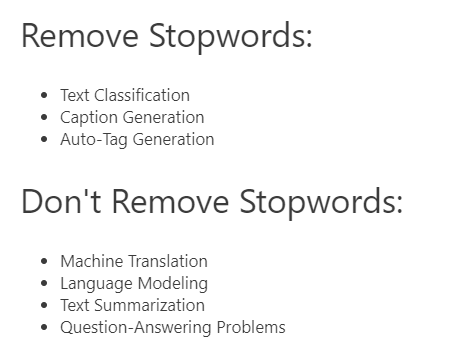

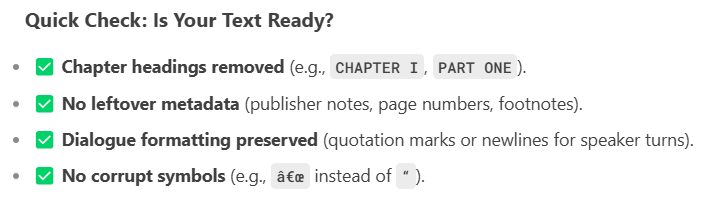

## lowering the text

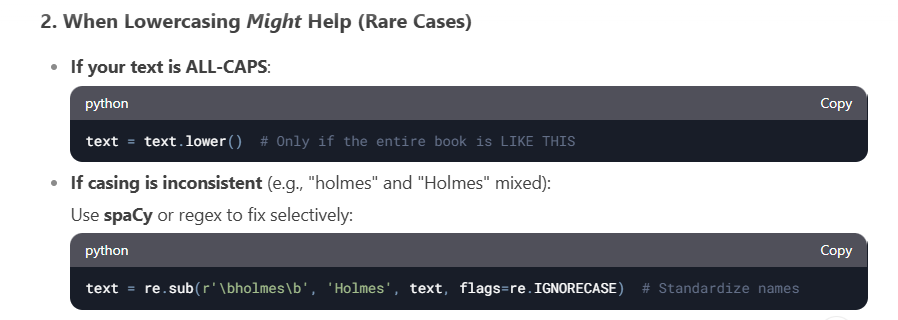

## wordcloud

In [30]:
!pip install wordcloud

In [31]:
pip show wordcloud

Name: wordcloud
Version: 1.9.4
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, pillow
Required-by: ydata-profiling
Note: you may need to restart the kernel to use updated packages.


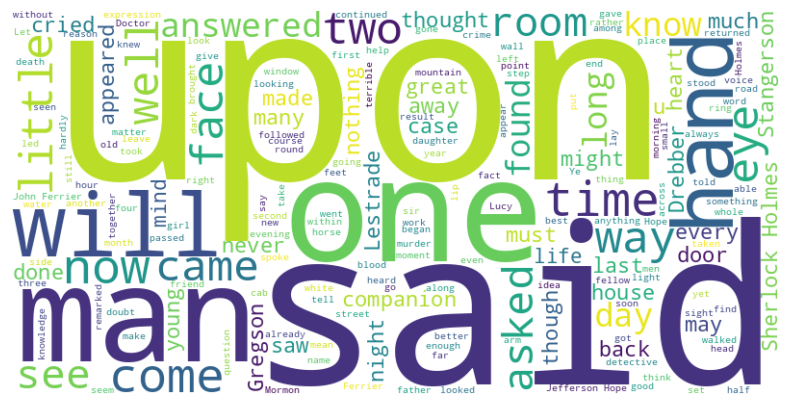

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_text_for_booknlp)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# performing booknlp

## nlp pipline used to process long txt like books

In [33]:
#installing java
!apt-get update
!apt-get install -y openjdk-11-jdk
!update-alternatives --set java /usr/lib/jvm/java-11-openjdk-amd64/jre/bin/java

# Verify Java installation
!java -version

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease                                              
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]                           
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]                             
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]                                
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [69.9 kB]                 
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]                           
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,381 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:11 https://r2

In [34]:
!javac -version

javac 11.0.26


In [35]:
!pwd

/kaggle/working


In [36]:
# Install dependencies
!git clone https://github.com/booknlp/booknlp.git
%cd booknlp
#download all things that all listed in setup.py
#dowload all requriments in editable files and . represent present working directory
!pip install -e .


fatal: destination path 'booknlp' already exists and is not an empty directory.
/kaggle/working/booknlp
Obtaining file:///kaggle/working/booknlp
  Preparing metadata (setup.py) ... done
  Running setup.py develop for booknlp


In [37]:
# Install BookNLP and its dependencies

!pip install "booknlp==1.0.7"

In [38]:
!pip show booknlp

Name: booknlp
Version: 1.0.7
Summary: 
Home-page: https://github.com/dbamman/book-nlp
Author: David Bamman
Author-email: dbamman@berkeley.edu
License: MIT
Location: /kaggle/working/booknlp
Editable project location: /kaggle/working/booknlp
Requires: spacy, tensorflow, torch, transformers
Required-by: 


In [39]:
!pip show spacy

Name: spacy
Version: 3.7.5
Summary: Industrial-strength Natural Language Processing (NLP) in Python
Home-page: https://spacy.io
Author: Explosion
Author-email: contact@explosion.ai
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: catalogue, cymem, jinja2, langcodes, murmurhash, numpy, packaging, preshed, pydantic, requests, setuptools, spacy-legacy, spacy-loggers, srsly, thinc, tqdm, typer, wasabi, weasel
Required-by: booknlp, en-core-web-sm, fastai


In [40]:
!pwd

/kaggle/working/booknlp


In [41]:
import booknlp
print(booknlp.__file__)  # This gives the package location

/kaggle/working/booknlp/booknlp/__init__.py


## code error fixing for booknlp library

In [42]:
import os
os.chdir("/kaggle/working/")

!wget https://github.com/mohdabuzaransari9/Interactive-literary-characters-ai/raw/main/files_update_for_booknlp_library.zip

--2025-03-28 00:21:15--  https://github.com/mohdabuzaransari9/Interactive-literary-characters-ai/raw/main/files_update_for_booknlp_library.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mohdabuzaransari9/Interactive-literary-characters-ai/main/files_update_for_booknlp_library.zip [following]
--2025-03-28 00:21:15--  https://raw.githubusercontent.com/mohdabuzaransari9/Interactive-literary-characters-ai/main/files_update_for_booknlp_library.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8383 (8.2K) [application/zip]
Saving to: ‘files_update_for_booknlp_library.zip.1’

files_update_for_bo

In [43]:
#verify file
!file files_update_for_booknlp_library.zip

files_update_for_booknlp_library.zip: Zip archive data, at least v2.0 to extract, compression method=store


In [44]:
#unzip
from zipfile import ZipFile
zip_ref=ZipFile(r"/kaggle/working/files_update_for_booknlp_library.zip")
zip_ref.extractall()
zip_ref.close()


In [45]:
import os


for root, dirs, files in os.walk("/kaggle/working/files_update_for_booknlp_library/"):
  for dir_name in dirs:
    print(os.path.join(root, dir_name))
  for file_name in files:
    print(os.path.join(root, file_name))


/kaggle/working/files_update_for_booknlp_library/litbank_coref.py
/kaggle/working/files_update_for_booknlp_library/booknlp.py
/kaggle/working/files_update_for_booknlp_library/entity_tagger.py
/kaggle/working/files_update_for_booknlp_library/entity_cat.tagset
/kaggle/working/files_update_for_booknlp_library/bert_qa.py


In [46]:
import pathlib# p is small

data_dir=pathlib.Path("/kaggle/working/files_update_for_booknlp_library/")

file_names=[class_names.name for class_names in data_dir.glob('*')]
file_names

['litbank_coref.py',
 'booknlp.py',
 'entity_tagger.py',
 'entity_cat.tagset',
 'bert_qa.py']

In [47]:
import shutil
import os

# Define the source files
source_files = [
    "/kaggle/working/files_update_for_booknlp_library/litbank_coref.py",
    "/kaggle/working/files_update_for_booknlp_library/bert_qa.py",
    "/kaggle/working/files_update_for_booknlp_library/entity_tagger.py",
    "/kaggle/working/files_update_for_booknlp_library/entity_cat.tagset",
    
]

destination = "/kaggle/working/booknlp/booknlp/english"  #  path

os.makedirs(destination, exist_ok=True)

# Copy each file to the destination directory (overriding if they exist)
for file_path in source_files:
    if os.path.exists(file_path):
        shutil.copy(file_path, destination)
        print(f"updating library files {file_path} to {destination}")
    else:
        print(f"File not found: {file_path}")

updating library files /kaggle/working/files_update_for_booknlp_library/litbank_coref.py to /kaggle/working/booknlp/booknlp/english
updating library files /kaggle/working/files_update_for_booknlp_library/bert_qa.py to /kaggle/working/booknlp/booknlp/english
updating library files /kaggle/working/files_update_for_booknlp_library/entity_tagger.py to /kaggle/working/booknlp/booknlp/english
updating library files /kaggle/working/files_update_for_booknlp_library/entity_cat.tagset to /kaggle/working/booknlp/booknlp/english


In [48]:
import shutil
import os

# Define the source files
source_files = [
    "/kaggle/working/files_update_for_booknlp_library/booknlp.py"
]

destination = "/kaggle/working/booknlp/booknlp/"  #  path

os.makedirs(destination, exist_ok=True)

# Copy each file to the destination directory (overriding if they exist)
for file_path in source_files:
    if os.path.exists(file_path):
        shutil.copy(file_path, destination)
        print(f"updating library files {file_path} to {destination}")
    else:
        print(f"File not found: {file_path}")

updating library files /kaggle/working/files_update_for_booknlp_library/booknlp.py to /kaggle/working/booknlp/booknlp/


In [49]:
!pwd

/kaggle/working


In [50]:
!ls /kaggle/working

book2.events	clean_text_for_booknlp.txt		output.zip
booknlp		files_update_for_booknlp_library	state.db
booknlp_output	files_update_for_booknlp_library.zip
book.txt	files_update_for_booknlp_library.zip.1


## If characters isn’t tagged as a character, we may need to tweak the NER model.

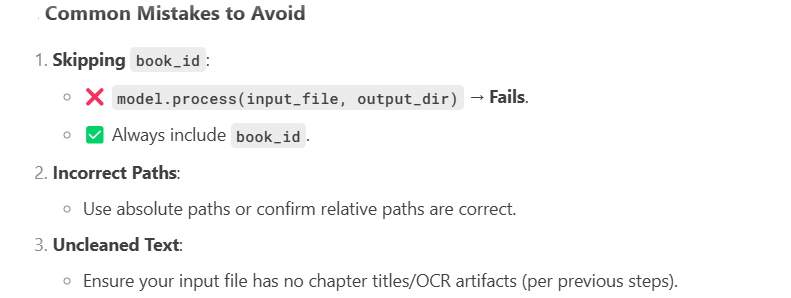

## running full pipeline 🤗

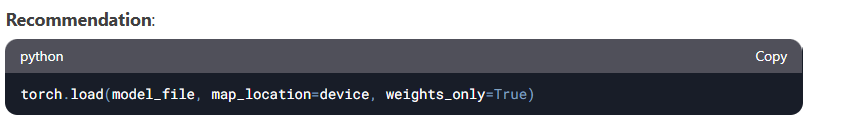

In [51]:
# importing booknlp class
from booknlp.booknlp import BookNLP

using device cpu


In [52]:
book_id_value="a_study_in_scarlet"

In [53]:
model_params={
		"pipeline":"entity,quote,supersense,event,coref",
		"model":"big",
        "book_id" : book_id_value
	}


In [54]:
!pwd

/kaggle/working


In [55]:
booknlp=BookNLP("en",model_params)

{'pipeline': 'entity,quote,supersense,event,coref', 'model': 'big', 'book_id': 'a_study_in_scarlet'}
downloading entities_google_bert_uncased_L-6_H-768_A-12-v1.0.model
downloading coref_google_bert_uncased_L-12_H-768_A-12-v1.0.model
downloading speaker_google_bert_uncased_L-12_H-768_A-12-v1.0.1.model


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/270M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

--- startup: 29.061 seconds ---


In [56]:
# Input and output paths
input_file = "/kaggle/working/clean_text_for_booknlp.txt"  # Adjust the path if your file is in a different directory
output_dir = "/kaggle/working/booknlp_output"  # Output will be saved in the working directory
book_id = book_id_value  # Use underscores or avoid spaces for compatibility

# Ensure the output directory exists
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Your processing code here (e.g., running BookNLP or other text processing)
# Example: Print the input file path and output directory for verification
print(f"Input file: {input_file}")
print(f"Output directory: {output_dir}")
print(f"Book ID: {book_id}")

Input file: /kaggle/working/clean_text_for_booknlp.txt
Output directory: /kaggle/working/booknlp_output
Book ID: a_study_in_scarlet


# this will take long time approx 10-15 min

In [57]:
%%time
# Process the book
booknlp.process(input_file, output_dir,book_id)

--- spacy: 10.162 seconds ---
--- entities: 153.783 seconds ---
--- quotes: 0.104 seconds ---
--- attribution: 276.404 seconds ---
--- name coref: 0.155 seconds ---
--- coref: 158.733 seconds ---
--- TOTAL (excl. startup): 599.666 seconds ---, 52013 words
CPU times: user 16min 18s, sys: 2min 10s, total: 18min 29s
Wall time: 9min 59s


In [58]:
# List output files
import os
print(os.listdir(output_dir))

['a_study_in_scarlet.supersense', 'a_study_in_scarlet.quotes', 'a_study_in_scarlet.entities', 'a_study_in_scarlet.book', 'a_study_in_scarlet.tokens', 'a_study_in_scarlet.book.html']


## The output from the BookNLP pipeline is three types of files:


1.   TSV files (.tokens, .entities, .quotes, .supersense),
2.   JSON file (.book)
3.   HTML file (.book.html)

## **creating dataframe**

In [60]:
df_tokens = pd.read_csv('/kaggle/working/booknlp_output/a_study_in_scarlet.tokens', delimiter="\t",)
df_tokens

,paragraph_ID,sentence_ID,token_ID_within_sentence,token_ID_within_document,word,lemma,byte_onset,byte_offset,POS_tag,fine_POS_tag,dependency_relation,syntactic_head_ID,event
0,0,0,0,0,In,in,0,2,ADP,IN,prep,5,O
1,0,0,1,1,the,the,3,6,DET,DT,det,2,O
2,0,0,2,2,year,year,7,11,NOUN,NN,pobj,0,O
3,0,0,3,3,1878,1878,12,16,NUM,CD,nummod,2,O
4,0,0,4,4,I,I,17,18,PRON,PRP,nsubj,5,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52008,792,2532,34,52008,in,in,238229,238231,ADP,IN,prep,52007,O
52009,792,2532,35,52009,arca,arca,238232,238236,PROPN,NNP,pobj,52008,O
52010,792,2532,36,52010,.,.,238236,238237,PUNCT,.,punct,51979,O
52011,792,2532,37,52011,',',238237,238238,PUNCT,'',punct,51979,O


In [61]:
df_entities = pd.read_csv("/kaggle/working/booknlp_output/a_study_in_scarlet.entities", delimiter="\t")
df_entities

,COREF,start_token,end_token,prop,cat,text
0,0,4,4,PRON,PER,I
1,0,6,6,PRON,PER,my
2,1,13,16,PROP,FAC,the University of London
3,2,16,16,PROP,GPE,London
4,3,21,21,PROP,GPE,Netley
...,...,...,...,...,...,...
7501,2293,51968,51969,NOM,PER,the public
7502,0,51977,51977,PRON,PER,you
7503,0,51980,51980,PRON,PER,yourself
7504,2311,51989,51991,NOM,PER,the Roman miser


In [62]:
df_quotes = pd.read_csv("/kaggle/working/booknlp_output/a_study_in_scarlet.quotes", delimiter="\t")
df_quotes

,quote_start,quote_end,mention_start,mention_end,mention_phrase,char_id,quote
0,391,394,364,366,a medical board,223,"Orontes ,"
1,735,746,747,747,he,107,"Whatever have you been doing with yourself , ..."
2,762,777,747,747,he,107,You are as thin as a lath and as brown as a n...
3,802,806,807,807,he,107,Poor devil !
4,820,828,813,813,he,107,What are you up to now ?
...,...,...,...,...,...,...,...
840,51638,51910,51924,51925,Sherlock Holmes,110,have lost a sensational treat through the sud...
841,51911,51922,51924,51925,Sherlock Holmes,110,Did n't I tell you so when we started ?
842,51930,51948,51954,51954,I,0,That 's the result of all our Study in Scarle...
843,51949,51953,51954,51954,I,0,"Never mind ,"


In [63]:
df_supersense = pd.read_csv('/kaggle/working/booknlp_output/a_study_in_scarlet.supersense', delimiter="\t")
df_supersense

,start_token,end_token,supersense_category,text
0,2,2,noun.time,year
1,5,5,verb.social,took
2,7,7,noun.communication,degree
3,9,11,noun.communication,Doctor of Medicine
4,14,16,noun.group,University of London
...,...,...,...,...
14459,51976,51976,noun.time,meantime
14460,51979,51979,verb.change,make
14461,51984,51984,noun.cognition,consciousness
14462,51986,51986,noun.state,success


##  large JSON file that contains information structured around the characters

In [64]:
import json

with open ("/kaggle/working/booknlp_output/a_study_in_scarlet.book", "r") as f:
    book_data = json.load(f)
book_data.keys()

dict_keys(['characters'])

## For each character, we have a dictionary with 8 keys

In [65]:
len(book_data["characters"])

450

In [66]:
book_data["characters"][5].keys()

dict_keys(['agent', 'patient', 'mod', 'poss', 'id', 'g', 'count', 'mentions'])

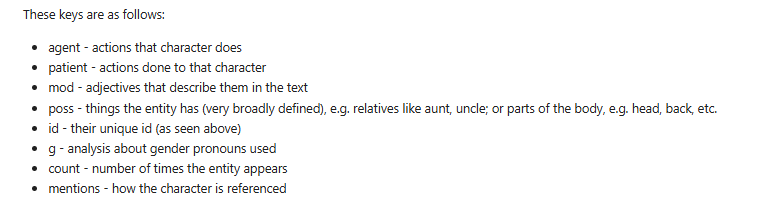

In [67]:
book_data["characters"][5]["agent"][:1]
book_data["characters"][5]["patient"][:1]
book_data["characters"][5]["mod"][:1]
book_data["characters"][5]["poss"][:1]
book_data["characters"][5]["id"]
book_data["characters"][5]["g"]
book_data["characters"][5]["count"]
book_data["characters"][5]["mentions"].keys()

dict_keys(['proper', 'common', 'pronoun'])

In [68]:
book_data["characters"][5]["agent"][:10]

[{'w': 'have', 'i': 44726},
 {'w': 'wish', 'i': 44731},
 {'w': 'reserve', 'i': 44788},
 {'w': 'look', 'i': 44814},
 {'w': 'say', 'i': 45243},
 {'w': 'leaned', 'i': 45270},
 {'w': 'began', 'i': 45276},
 {'w': 'spoke', 'i': 45283},
 {'w': 'narrated', 'i': 45297},
 {'w': 'hated', 'i': 45350}]

In [69]:
book_data["characters"][5]["mod"][:10]

[{'w': 'Doctor', 'i': 44829},
 {'w': 'likely', 'i': 45234},
 {'w': 'determined', 'i': 45889},
 {'w': 'janitor', 'i': 47292},
 {'w': 'sweeper', 'i': 47294},
 {'w': 'dispenser', 'i': 47381},
 {'w': 'mad', 'i': 48088},
 {'w': 'able', 'i': 49638}]

In [70]:
book_data["characters"][5]["poss"][:10]

[{'w': 'words', 'i': 44741},
 {'w': 'trial', 'i': 44792},
 {'w': 'chair', 'i': 45274},
 {'w': 'work', 'i': 45593},
 {'w': 'hand', 'i': 45611},
 {'w': 'gentlemen', 'i': 45806},
 {'w': 'mercy', 'i': 45856},
 {'w': 'beard', 'i': 45862},
 {'w': 'opportunity', 'i': 45885},
 {'w': 'fear', 'i': 46108}]

In [71]:

book_data["characters"][5]["id"]

166

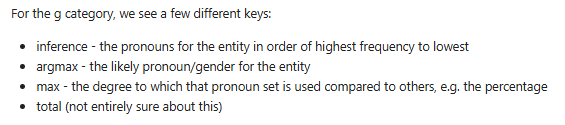

In [72]:
book_data["characters"][5]["g"]

{'inference': {'he/him/his': 0.811,
  'she/her': 0.113,
  'they/them/their': 0.077,
  'xe/xem/xyr/xir': 0.0,
  'ze/zem/zir/hir': 0.0},
 'argmax': 'he/him/his',
 'max': 0.811,
 'total': 200003.072}

In [73]:
book_data["characters"][5]["count"]

187

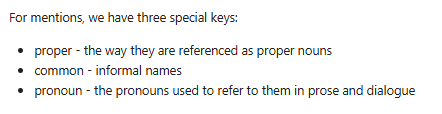

In [74]:
book_data["characters"][5]["mentions"].keys()

dict_keys(['proper', 'common', 'pronoun'])

In [75]:
book_data["characters"][5]["mentions"]["proper"]

[{'c': 5, 'n': 'Jefferson Hope'},
 {'c': 2, 'n': 'Mr. Jefferson Hope'},
 {'c': 1, 'n': 'Hope'}]

In [76]:
book_data["characters"][5]["mentions"]["common"]

[]

In [77]:
book_data["characters"][5]["mentions"]["pronoun"]

[{'c': 91, 'n': 'I'},
 {'c': 27, 'n': 'my'},
 {'c': 20, 'n': 'me'},
 {'c': 10, 'n': 'his'},
 {'c': 9, 'n': 'you'},
 {'c': 9, 'n': 'he'},
 {'c': 2, 'n': 'your'},
 {'c': 2, 'n': 'You'},
 {'c': 2, 'n': 'He'},
 {'c': 2, 'n': 'My'},
 {'c': 2, 'n': 'him'},
 {'c': 2, 'n': 'myself'},
 {'c': 1, 'n': 'himself'}]

## Character Analysis

 load up the JSON data from the .book file and count the occurrences of certain things found within the .book file.

In [78]:
import json
from collections import Counter

In [79]:
#loads and parses the JSON file for us using the JSON library
def proc(filename):
    with open(filename) as file:
        data=json.load(file)
    return data

In [80]:
def get_counter_from_dependency_list(dep_list):
    counter=Counter()
    for token in dep_list:
        term=token["w"]
        tokenGlobalIndex=token["i"]
        counter[term]+=1
    return counter

In [81]:
data=proc("/kaggle/working/booknlp_output/a_study_in_scarlet.book")

 # create some character_data



In [82]:
def create_character_data(data, printTop):
    character_data = {}
    for character in data["characters"]:

        agentList=character["agent"]
        patientList=character["patient"]
        possList=character["poss"]
        modList=character["mod"]

        character_id=character["id"]
        count=character["count"]

        referential_gender_distribution=referential_gender_prediction="unknown"

        if character["g"] is not None and character["g"] != "unknown":
            referential_gender_distribution=character["g"]["inference"]
            referential_gender=character["g"]["argmax"]

        mentions=character["mentions"]
        proper_mentions=mentions["proper"]
        max_proper_mention=""
        
        #Let's create some empty lists that we can append to.
        poss_items = []
        agent_items = []
        patient_items = []
        mod_items = []
    
        # just print out information about named characters
        if len(mentions["proper"]) > 0:
            max_proper_mention=mentions["proper"][0]["n"]
            for k, v in get_counter_from_dependency_list(possList).most_common(printTop):
                poss_items.append((v,k))
                
            for k, v in get_counter_from_dependency_list(agentList).most_common(printTop):
                agent_items.append((v,k))     

            for k, v in get_counter_from_dependency_list(patientList).most_common(printTop):
                patient_items.append((v,k))     

            for k, v in get_counter_from_dependency_list(modList).most_common(printTop):
                mod_items.append((v,k))  

            
            
            
            # print(character_id, count, max_proper_mention, referential_gender)
            character_data[character_id] = {"id": character_id,
                                  "count": count,
                                  "max_proper_mention": max_proper_mention,
                                  "referential_gender": referential_gender,
                                  "possList": poss_items,
                                  "agentList": agent_items,
                                  "patientList": patient_items,
                                  "modList": mod_items
                                 }
                                
    return character_data


1.  thee data that we created above, i.e. the original .book JSON data
2.  printTop which will be the number of items you seek to return about the character

### create some character_data now that will retain the top 10 items connected to each character. If you want to see all possible things connected to the character, simply set this item to a very high number, e.g. 20000

In [83]:

character_data = create_character_data(data, 10)

In [84]:
print (character_data[143])

{'id': 143, 'count': 2, 'max_proper_mention': 'William Whyte', 'referential_gender': 'he/him/his', 'possList': [(1, 'writing')], 'agentList': [], 'patientList': [], 'modList': []}


## main gender, verbs, possession items, etc. connected to someone

##  agent and patient. Within each will be the verbs used in the text. These will be matched to a list of the characters connected to those verbs.

In [85]:
def find_verb_usage(data, analysis=["agent", "patient"]):
    new_analysis = []
    for item in analysis:
        if item == "agent":
            new_analysis.append("agentList")
        elif item == "patient":
            new_analysis.append("patientList")
    main_agents = {}
    main_patients = {}
    for character in character_data:
        temp_data = character_data[character]
        for item in new_analysis:
            for verb in temp_data[item]:
                verb = verb[1].lower()
                if item == "agentList":
                    if verb not in main_agents:
                        main_agents[verb] = [(character, temp_data["max_proper_mention"])]
                    else:
                        main_agents[verb].append((character, temp_data["max_proper_mention"]))
                elif item == "patientList":
                    if verb not in main_patients:
                        main_patients[verb] = [(character, temp_data["max_proper_mention"])]
                    else:
                        main_patients[verb].append((character, temp_data["max_proper_mention"]))
    verb_usage = {"agent": main_agents,
                 "patient": main_patients}
    return verb_usage

In [86]:
verb_data = find_verb_usage(data)

In [87]:
#  analyze the characters in a verb-centric manner
# was interested in what characters were the agents of the verb "wish".

verb_data["agent"]["took"]

[(110, 'Holmes'), (166, 'Jefferson Hope'), (122, 'Lecoq')]

** our verbs are not lemmatized **

In [ ]:
# If you want to see how verbs area used by all characters, 
# create a new character data file and make your top-n equal to a larger number.

In [88]:
import pandas as pd
df = pd.read_csv("/kaggle/working/booknlp_output/a_study_in_scarlet.tokens", delimiter="\t")
df

,paragraph_ID,sentence_ID,token_ID_within_sentence,token_ID_within_document,word,lemma,byte_onset,byte_offset,POS_tag,fine_POS_tag,dependency_relation,syntactic_head_ID,event
0,0,0,0,0,In,in,0,2,ADP,IN,prep,5,O
1,0,0,1,1,the,the,3,6,DET,DT,det,2,O
2,0,0,2,2,year,year,7,11,NOUN,NN,pobj,0,O
3,0,0,3,3,1878,1878,12,16,NUM,CD,nummod,2,O
4,0,0,4,4,I,I,17,18,PRON,PRP,nsubj,5,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52008,792,2532,34,52008,in,in,238229,238231,ADP,IN,prep,52007,O
52009,792,2532,35,52009,arca,arca,238232,238236,PROPN,NNP,pobj,52008,O
52010,792,2532,36,52010,.,.,238236,238237,PUNCT,.,punct,51979,O
52011,792,2532,37,52011,',',238237,238238,PUNCT,'',punct,51979,O


In [89]:
df = df[["sentence_ID", "word", "lemma", "event"]]
df

,sentence_ID,word,lemma,event
0,0,In,in,O
1,0,the,the,O
2,0,year,year,O
3,0,1878,1878,O
4,0,I,I,O
...,...,...,...,...
52008,2532,in,in,O
52009,2532,arca,arca,O
52010,2532,.,.,O
52011,2532,',',O


In [ ]:
# some event columns contain NaN. Ideally, we want to ignore these entirely. 
# We can do this in pandas by using the isnull() method.

In [90]:
events = df[~df['event'].isnull()]
events

,sentence_ID,word,lemma,event
0,0,In,in,O
1,0,the,the,O
2,0,year,year,O
3,0,1878,1878,O
4,0,I,I,O
...,...,...,...,...
52007,2532,contemplor,contemplor,O
52008,2532,in,in,O
52009,2532,arca,arca,O
52010,2532,.,.,O


In [91]:
event_options = set(events['event'].tolist())

In [92]:

print (event_options)

{'O', 'EVENT'}


In [93]:
real_events = events.loc[df["event"] == "EVENT"]
real_events

,sentence_ID,word,lemma,event
5,0,took,take,EVENT
37,1,studies,study,EVENT
43,1,attached,attach,EVENT
79,3,landing,landing,EVENT
84,3,learned,learn,EVENT
...,...,...,...,...
51835,2527,apprehended,apprehend,EVENT
51915,2529,tell,tell,EVENT
51923,2529,cried,cry,EVENT
51928,2529,laugh,laugh,EVENT


In [94]:
event_words = set(real_events["word"].tolist())
len(event_words)

1103

In [95]:
event_lemmas = list(set(real_events["lemma"].tolist()))
event_lemmas.sort()
len(event_lemmas)

845

In [96]:
print (event_lemmas[:10])

['abandon', 'absence', 'absent', 'accommodate', 'accompany', 'accost', 'acknowledge', 'act', 'action', 'add']


In [ ]:
# some lemmas are capitalized. Let's eliminate all duplicates by lowering all lemmas.


In [97]:
final_lemmas = []
for lemma in event_lemmas:
    lemma = lemma.lower()
    if lemma not in final_lemmas:
        final_lemmas.append(lemma)
        
print(len(final_lemmas))
print(final_lemmas[:10])

845
['abandon', 'absence', 'absent', 'accommodate', 'accompany', 'accost', 'acknowledge', 'act', 'action', 'add']


### grabbing event sentences

In [98]:
sentences = real_events.sentence_ID.tolist()
events = real_events.word.tolist()
print (sentences[:10])
print (events[:10])

[0, 1, 1, 3, 3, 3, 4, 4, 4, 4]
['took', 'studies', 'attached', 'landing', 'learned', 'advanced', 'followed', 'reaching', 'found', 'entered']


In [102]:
# Get the specific sentence ID you want to match
sentence1 = sentences[5]  # Using a clearer variable name

# Filter the DataFrame for matching rows (with type conversion safety)
result = df[df["sentence_ID"].astype(int) == int(sentence1)]

print(result) 

     sentence_ID      word    lemma  event
78             3        On       on      O
79             3   landing  landing  EVENT
80             3        at       at      O
81             3    Bombay   Bombay      O
82             3         ,        ,      O
83             3         I        I      O
84             3   learned    learn  EVENT
85             3      that     that      O
86             3        my       my      O
87             3     corps    corps      O
88             3       had     have      O
89             3  advanced  advance  EVENT
90             3   through  through      O
91             3       the      the      O
92             3    passes     pass      O
93             3         ,        ,      O
94             3       and      and      O
95             3       was       be      O
96             3   already  already      O
97             3      deep     deep      O
98             3        in       in      O
99             3       the      the      O
100        

In [103]:
#  grab all the words and reconstruct the sentence.

words = result.word.tolist()
resentence = " ".join(words)
print (resentence)

On landing at Bombay , I learned that my corps had advanced through the passes , and was already deep in the enemy 's country .


In [104]:
#tokens file.
# It will find the relevant event rows and then reconstruct the sentences
# that correspond to each event word.
#The output will be a list of dictionaries that are event-centric
# Each dictionary will have 3 keys:

# event_word = the event-triggering word
# event_lemma = the event_word's lemma
# sentence = the sentence that the event-triggering word is in

In [106]:
def grab_event_sentences(file):
    # Read the data and ensure word column is string type
    df = pd.read_csv(file, delimiter="\t")
    df['word'] = df['word'].astype(str)  # Convert all words to strings
    
    # Filter for EVENT rows
    real_events = df[df["event"] == "EVENT"].copy()
    
    # Initialize output list
    final_sentences = []
    
    # Process each event
    for _, event_row in real_events.iterrows():
        # Get all words in this sentence (convert to string again for safety)
        sentence_rows = df[df["sentence_ID"] == event_row["sentence_ID"]]
        words = sentence_rows["word"].astype(str).tolist()  # Force string conversion
        full_sentence = " ".join(words)
        
        # Add to results
        final_sentences.append({
            "event_word": str(event_row["word"]),  # Ensure string
            "event_lemma": str(event_row["lemma"]),  # Ensure string
            "sentence": full_sentence
        })
    
    return final_sentences

In [107]:
event_data = grab_event_sentences("/kaggle/working/booknlp_output/a_study_in_scarlet.tokens")

In [108]:
print (event_data[5])

{'event_word': 'advanced', 'event_lemma': 'advance', 'sentence': "On landing at Bombay , I learned that my corps had advanced through the passes , and was already deep in the enemy 's country ."}


In [109]:
new_df = pd.DataFrame(event_data)
new_df

,event_word,event_lemma,sentence
0,took,take,In the year 1878 I took my degree of Doctor of...
1,studies,study,"Having completed my studies there , I was duly..."
2,attached,attach,"Having completed my studies there , I was duly..."
3,landing,landing,"On landing at Bombay , I learned that my corps..."
4,learned,learn,"On landing at Bombay , I learned that my corps..."
...,...,...,...
2686,apprehended,apprehend,"The man was apprehended , it appears , in the ..."
2687,tell,tell,\t \t Did n't I tell you so when we started ? ...
2688,cried,cry,\t \t Did n't I tell you so when we started ? ...
2689,laugh,laugh,\t \t Did n't I tell you so when we started ? ...


In [110]:
new_df.to_csv("/kaggle/working/book.events", index=False)

## **Zipping the output directory**

### !zip -r file_name.zip foldername

###   -r standsfor recursive


In [116]:
# Zip the folder
!zip -r output.zip /kaggle/working/



  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/book.txt (deflated 62%)
  adding: kaggle/working/clean_text_for_booknlp.txt (deflated 61%)
  adding: kaggle/working/booknlp_output/ (stored 0%)
  adding: kaggle/working/booknlp_output/a_study_in_scarlet.supersense (deflated 70%)
  adding: kaggle/working/booknlp_output/a_study_in_scarlet.quotes (deflated 62%)
  adding: kaggle/working/booknlp_output/a_study_in_scarlet.entities (deflated 71%)
  adding: kaggle/working/booknlp_output/a_study_in_scarlet.book (deflated 83%)
  adding: kaggle/working/booknlp_output/a_study_in_scarlet.tokens (deflated 71%)
  adding: kaggle/working/booknlp_output/a_study_in_scarlet.book.html (deflated 87%)
  adding: kaggle/working/files_update_for_booknlp_library/ (stored 0%)
  adding: kaggle/working/files_update_for_booknlp_library/litbank_coref.py (deflated 66%)
  adding: kaggle/working/files_update_for_booknlp_library/booknlp.py (deflated 57%)
  adding: kaggle/working/files_update_for_booknlp_libra

In [117]:
# Create download link
from IPython.display import FileLink
FileLink('output.zip')

/kaggle/working/output.zip

## Huggingface

In [1]:
pip show transformers accelerate

Name: transformers
Version: 4.47.0
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: kaggle-environments, peft, sentence-transformers
---
Name: accelerate
Version: 1.2.1
Summary: Accelerate
Home-page: https://github.com/huggingface/accelerate
Author: The HuggingFace team
Author-email: zach.mueller@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: huggingface-hub, numpy, packaging, psutil, pyyaml, safetensors, torch
Required-by: peft
Note: you may need to restart the kernel to use

In [2]:
!pip install huggingface_hub

In [3]:

pip show huggingface_hub

Name: huggingface-hub
Version: 0.29.0
Summary: Client library to download and publish models, datasets and other repos on the huggingface.co hub
Home-page: https://github.com/huggingface/huggingface_hub
Author: Hugging Face, Inc.
Author-email: julien@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, packaging, pyyaml, requests, tqdm, typing-extensions
Required-by: accelerate, datasets, diffusers, peft, sentence-transformers, timm, tokenizers, torchtune, transformers
Note: you may need to restart the kernel to use updated packages.


In [4]:
import huggingface_hub
huggingface_hub.login()

In [5]:
# !pip install "datasets==3.3.1" #Downgrade to a compatible version previous i was trying 2.1.0
# import datasets

In [ ]:
# try:
#     import random
#     import torch
#     import evaluate
#     import accelerate
#     import transformers
#     import gradio as gr

# except ModuleNotFoundError:
#   !pip install "evaluate==0.4.3"
#   !pip install "accelerate==1.5.2"
#   !pip install "gradio==5.22.0"
#   !pip install "transformers==4.49.0"

# print(f'[INFO] torch version {torch.__version__}')

# print(f'[INFO] datasets version {datasets.__version__}')

In [6]:
pip show torch datasets evaluate accelerate transformers gradio

Name: torch
Version: 2.5.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, easyocr, fastai, kornia, peft, pytorch-ignite, pytorch-lightning, sentence-transformers, stable-baselines3, timm, torchaudio, torchmetrics, torchvision
---
Name: datasets
Version: 3.3.1
Summary: HuggingFace community-driven open-source library of datasets
Home-page: https://github.com/huggingface/datasets
Author: HuggingFace Inc.
Author-email: thomas@huggingface.co
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, dill, filelock, fsspec, huggingface-hub, multiprocess, numpy, packaging, pandas, pyarrow, pyyaml, requests, tqdm, xxhash
Required-by: torchtune
---
Name: accelerate
Versi

In [7]:
pip show transformers

Name: transformers
Version: 4.47.0
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: kaggle-environments, peft, sentence-transformers
Note: you may need to restart the kernel to use updated packages.


In [8]:
! pip install "bitsandbytes==0.43.1"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 13.7 MB/s eta 0:00:00:00:0100:01


In [12]:
from transformers import AutoTokenizer

# Load tokenizer
tokenizer= AutoTokenizer.from_pretrained(pretrained_model_name_or_path="mistralai/Mistral-7B-Instruct-v0.1",
                                        use_fast=True)
tokenizer

tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

LlamaTokenizerFast(name_or_path='mistralai/Mistral-7B-Instruct-v0.1', vocab_size=32000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='left', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [13]:
import torch
print(torch.version.cuda)  # Prints the CUDA version (e.g., '11.8')
print(torch.cuda.is_available())  # Should return True


12.1
True


In [14]:
import torch
from peft import LoraConfig, AutoPeftModelForCausalLM, prepare_model_for_kbit_training, get_peft_model
from transformers import AutoModelForCausalLM, AutoTokenizer, TrainingArguments
import os

In [15]:
from transformers import BitsAndBytesConfig

In [16]:
# Load a 4-bit quantized model
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,    # Enable 4-bit quantization
    bnb_4bit_compute_dtype=torch.float16,  # Use fp16 for computation
    bnb_4bit_use_double_quant=True,  # Use double quantization for memory efficiency
)

In [19]:

# Load model and tokenizer
model = AutoModelForCausalLM.from_pretrained(
    "mistralai/Mistral-7B-Instruct-v0.1",
    quantization_config=quantization_config,
    device_map="auto"  # Automatically assigns layers to available GPUs
)

ImportError: Using `bitsandbytes` 4-bit quantization requires the latest version of bitsandbytes: `pip install -U bitsandbytes`

In [18]:
print(model)

NameError: name 'model' is not defined

In [118]:
!pip list

Package                            Version              Editable project location
---------------------------------- -------------------- -------------------------
absl-py                            1.4.0
accelerate                         1.2.1
aiofiles                           22.1.0
aiohappyeyeballs                   2.4.6
aiohttp                            3.11.12
aiosignal                          1.3.2
aiosqlite                          0.21.0
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
alembic                            1.14.1
altair                             5.5.0
annotated-types                    0.7.0
annoy                              1.17.3
ansicolors                         1.1.8
antlr4-python3-runtime             4.9.3
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
args                               0.1.0
array_

## how to download kaggle output input directory files

In [ ]:
# from IPython.display import FileLink
# FileLink('/kaggle/working/cleaned_txt.txt')

## kaggle how to delete a working directory file¶

In [ ]:
# import os

# # Delete a single file
# os.remove("/kaggle/working/cleaned_text.txt")  # Replace with your filename

#  Check if file exists before deleting (optional)
# if os.path.exists("/kaggle/working/cleaned_text.txt"):
#     os.remove("/kaggle/working/cleaned_text.txt")
# else:
#     print("File does not exist.")

## deleting a folder

In [ ]:
# # removing a directory
# import shutil

# # Delete an entire directory and its contents
# shutil.rmtree("/kaggle/working/booknlp_output")  # Use with caution!

In [ ]:
# !zip -r output.zip /kaggle/working
# from IPython.display import FileLink
# FileLink('/kaggle/working/output.zip')

In [ ]:
# #HF_Token access

# from kaggle_secrets import UserSecretsClient
# user_secrets = UserSecretsClient()
# HF_TOKEN = user_secrets.get_secret("HF_TOKEN")
